In [68]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import seaborn as sb

In [17]:
banks = pd.read_csv('Bank New 1.csv')
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [18]:
print(banks.shape)

(45211, 17)


In [19]:
print(list(banks.columns))

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [20]:
banks.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no   2143.0     yes   no   
1       44    technician    single  secondary      no     29.0     yes   no   
2       33  entrepreneur   married  secondary      no      2.0     yes  yes   
3       47   blue-collar   married    unknown      no   1506.0     yes   no   
4       33       unknown    single    unknown      no      1.0      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no    825.0      no   no   
45207   71       retired  divorced    primary      no   1729.0      no   no   
45208   72       retired   married  secondary      no   5715.0      no   no   
45209   57   blue-collar   married  secondary      no    668.0      no   no   
45210   37  entrepreneur   married  secondary      no   2971.0      no   no   

         contact   

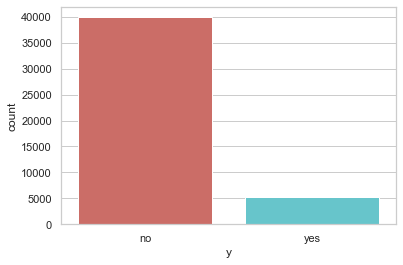

In [21]:
sns.countplot(x='y',data=banks, palette='hls')
plt.show()

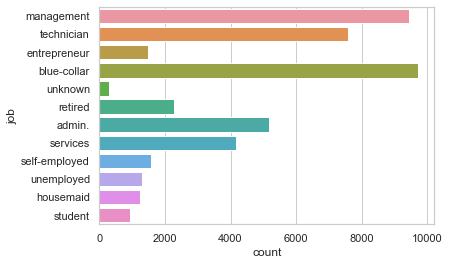

In [24]:
sns.countplot(y="job", data=banks)
plt.show()

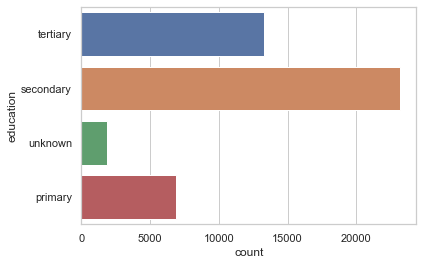

In [25]:
sns.countplot(y="education", data=banks)
plt.show()

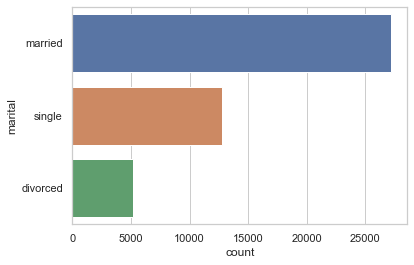

In [27]:
sns.countplot(y="marital", data=banks)
plt.show()

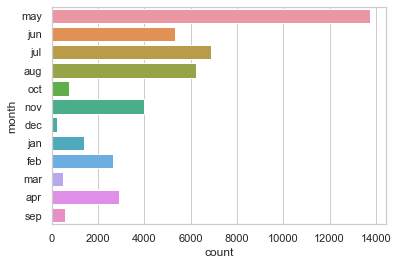

In [28]:
sns.countplot(y="month", data=banks)
plt.show()

In [29]:
banks.job.value_counts()


blue-collar      9732
management       9458
technician       7597
admin.           5170
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [30]:
banks.marital.value_counts()


married     27214
single      12789
divorced     5207
Name: marital, dtype: int64

In [33]:
banks.poutcome.value_counts()

unknown    36959
failure     4900
other       1840
success     1511
Name: poutcome, dtype: int64

In [32]:
banks.pdays.value_counts()

-1.0      36954
 182.0      167
 92.0       147
 183.0      126
 91.0       126
          ...  
 65.0         1
 51.0         1
 424.0        1
 449.0        1
 526.0        1
Name: pdays, Length: 559, dtype: int64

In [47]:
## getting dummy variables for job, marital, education, default, housing, loan, duration, poutcome, y
banks_dummy = pd.get_dummies(banks[["job","marital","education","default","housing","loan","duration","poutcome","y"]])
banks_dummy

,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,261.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
1,151.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,76.0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
3,92.0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
4,198.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977.0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
45207,456.0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
45208,1127.0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,1
45209,508.0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0


In [58]:
banks2.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'duration',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_no',
       'y_yes'],
      dtype='object')

In [54]:
banks2=banks2.drop((["month"]), axis=1)
banks2

,age,balance,day,campaign,pdays,previous,duration,job_admin.,job_blue-collar,job_entrepreneur,...,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143.0,5.0,1.0,-1.0,0.0,261.0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
1,44,29.0,5.0,1.0,-1.0,0.0,151.0,0,0,0,...,0,1,1,0,0,0,0,1,1,0
2,33,2.0,5.0,1.0,-1.0,0.0,76.0,0,0,1,...,0,1,0,1,0,0,0,1,1,0
3,47,1506.0,5.0,1.0,-1.0,0.0,92.0,0,1,0,...,0,1,1,0,0,0,0,1,1,0
4,33,1.0,5.0,1.0,-1.0,0.0,198.0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825.0,17.0,3.0,-1.0,0.0,977.0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
45207,71,1729.0,17.0,2.0,-1.0,0.0,456.0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
45208,72,5715.0,17.0,5.0,184.0,3.0,1127.0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
45209,57,668.0,17.0,4.0,-1.0,0.0,508.0,0,1,0,...,1,0,1,0,0,0,0,1,1,0


In [85]:
### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(banks2, test_size = 0.2) # 20% test data 80% train data


In [86]:
# Model building 
import statsmodels.formula.api as sm
model1 = sm.logit('y_yes ~ pdays+duration+marital_divorced+marital_married+marital_single+default_no+default_yes+housing_no+housing_yes+loan_no+loan_yes', data = train_data).fit()
model1.summary()

         Current function value: 0.280756
         Iterations: 35


C:\Users\User-PC\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_yes   No. Observations:                36167
Model:                          Logit   Df Residuals:                    36159
Method:                           MLE   Df Model:                            7
Date:                Sun, 08 Aug 2021   Pseudo R-squ.:                  0.2212
Time:                        15:43:28   Log-Likelihood:                -10154.
converged:                      False   LL-Null:                       -13038.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.3851        nan        nan        nan         nan         nan
pdays                0.0040      0.000     25.347      0.000       0.004       0.004
duration             0.0038   6.53e-05     58.072      0.000       0.004       0.004
marital_divorced    -0.4747   1.29e+06  -3.68e-07      1.000   -2.53e+06    2.53e+06
marital_married     -0.6745   1.29e+06  -5.23e-07      1.000   -2.53e+06    2.53e+06
marital_single      -0.2359   1.29e+06  -1.83e-07      1.000   -2.53e+06    2.53e+06
default_no          -0.5271        nan        nan        nan         nan         nan
default_yes         -0.8580        nan        nan        nan         nan         nan
housing_no          -0.0918        nan        nan        nan         nan         nan
housing_yes         -1.2933        nan        nan        nan         nan         nan
loan_no             -0.3312        nan        nan        nan         nan         nan
loan_yes            -1.0539        nan        nan        nan         nan         nan
====================================================================================
"""

In [87]:
## Evaluation of the model
predict_test = model1.predict(pd.DataFrame(test_data[['pdays','duration','marital_divorced','marital_married','marital_single','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes']]))
predict_test

21534    0.061275
27380    0.068883
30262    0.430388
18675    0.039774
7817     0.058887
           ...   
39017    0.053940
43312    0.302769
26419    0.017156
15045    0.030379
8150     0.129361
Length: 9043, dtype: float64

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [88]:
cnf_test_matrix = confusion_matrix(test_data['y_yes'], predict_test > 0.5 )
cnf_test_matrix

array([[7863,  115],
       [ 858,  207]], dtype=int64)

In [89]:
print(accuracy_score(test_data.y_yes, predict_test > 0.5))

0.8924029636182683


In [90]:
## Error on train data
predict_train = model1.predict(pd.DataFrame(train_data[['pdays','duration','marital_divorced','marital_married','marital_single','default_no','default_yes','housing_no','housing_yes','loan_no','loan_yes']]))
predict_train

7545     0.010001
43295    0.468711
9728     0.068640
41264    0.061775
17777    0.019760
           ...   
14931    0.007167
40911    0.133321
15607    0.056263
28825    0.120381
40636    0.123149
Length: 36168, dtype: float64

In [91]:
cnf_train_matrix = confusion_matrix(train_data['y_yes'], predict_test > 0.5 )

ValueError: Found input variables with inconsistent numbers of samples: [36168, 9043]

In [93]:
print(accuracy_score(train_data.y_yes, predict_train > 0.5))

0.8898473788984738
